In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))


In [2]:
from tensorflow.keras.utils import to_categorical #분류분석시 원핫인코딩
import pandas as pd
from tensorflow.keras.models import Sequential, load_model # 모델생성, 모델 model
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝: 데이터의 규칙성을 추출
- 응용분야: 글짜인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타겟=종속변수)
        * = 분류학습(타겟변수가 category 변수인 분석. 다중분류 vs 이진분류)
    * 비지도학습
       * 군집화
    * 강화학습
- 지도학습에서의 딥러닝 프로그래밍 방식
    - 데이터 확보 및 생성
    - 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋, 원핫인
    - 모델구성
    - 모델 학습 과정 설정
    - 모델 학습시키기(훈련, 검증데이터셋)
    - 모델 평가(시험데이터셋)
    - 모델 저장/사용(입력값을 주어지면 예측값을 받기)

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [3]:
# 학습데이터= 훈련데이터셋
x_train= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]*10)
y_train= np.array([2, 4, 6, 8, 10, 12, 14, 16, 18]*10)
# 검증데이터, 시험데이터 셋
x_val= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val= np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [4]:
# 인코딩 종류
# 라벨인코딩= 문자를 숫자로
# 원핫인코딩= 고유한 값의 개수만큼 새로운 열을 만들고 해당범주에 해당하는 열에만 1을 나머지는 0
data= np.array(['a','b','c','b','b'])
print('원 데이터', data)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
labeling_data= le.fit_transform(data)
print('라벨인코딩된 데이터: ', labeling_data)
one_hot_encoding_data= to_categorical(labeling_data)
print('원핫인 코딩된 데이터: \n', one_hot_encoding_data)

원 데이터 ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터:  [0 1 2 1 1]
원핫인 코딩된 데이터: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [14]:
# 원핫인코딩(분류분석을 위한 target변수)
data= np.array([1,4,5,4,5])
categorical_onehot= to_categorical(data)
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot= pd.get_dummies(data)
print('get_dummies이용 \n' , getdummies_onehot)


to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies이용 
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1


In [6]:
# 분류분석을 위한 target변수 원핫인코딩
Y_train= to_categorical(y_train, 19)
Y_val= to_categorical(y_val)

In [7]:
x_train.shape, Y_train.shape, Y_val.shape, x_val.shape

((90,), (90, 19), (9, 19), (9,))

# 3.모델구성

In [20]:
model= Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38,activation='sigmoid')) # 활성화 함수: relu, elu, tanh, sigmoid
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 38)                76        
                                                                 
 dense_4 (Dense)             (None, 64)                2496      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4절 모델 학습과정 설정
- 회귀분석에서의 loss: mse, rmse, mae
- 다중 분류분석에서의 loss: categorical_crossentropy


In [23]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# 5. 모델 학습시키기

In [25]:
hist= model.fit(x_train, Y_train, epochs=300, batch_size=10,
               validation_data=(x_val, Y_val), verbose=2)
#verbose=0: 출력없음/ 1: 기본값출력 2: 에포크별 자세한 로그 출력

Epoch 1/300
9/9 - 1s - loss: 2.9849 - accuracy: 0.1222 - val_loss: 2.7605 - val_accuracy: 0.1111 - 846ms/epoch - 94ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6561 - accuracy: 0.1444 - val_loss: 2.5244 - val_accuracy: 0.2222 - 64ms/epoch - 7ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4616 - accuracy: 0.1778 - val_loss: 2.3734 - val_accuracy: 0.2222 - 41ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3335 - accuracy: 0.2444 - val_loss: 2.2583 - val_accuracy: 0.2222 - 58ms/epoch - 6ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2256 - accuracy: 0.2333 - val_loss: 2.1690 - val_accuracy: 0.4444 - 55ms/epoch - 6ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1438 - accuracy: 0.2778 - val_loss: 2.0945 - val_accuracy: 0.2222 - 57ms/epoch - 6ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0777 - accuracy: 0.2333 - val_loss: 2.0297 - val_accuracy: 0.3333 - 50ms/epoch - 6ms/step
Epoch 8/300
9/9 - 0s - loss: 2.0208 - accuracy: 0.3444 - val_loss: 1.9702 - val_accuracy: 0.3333 - 56ms/epoch - 6ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3643 - accuracy: 0.9778 - val_loss: 0.3470 - val_accuracy: 1.0000 - 59ms/epoch - 7ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3555 - accuracy: 1.0000 - val_loss: 0.3391 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3396 - accuracy: 1.0000 - val_loss: 0.3232 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3307 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3218 - accuracy: 1.0000 - val_loss: 0.3048 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3119 - accuracy: 1.0000 - val_loss: 0.2989 - val_accuracy: 1.0000 - 50ms/epoch - 6ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2966 - accuracy: 1.0000 - val_loss: 0.2891 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2887 - accuracy: 1.0000 - val_loss: 0.2776 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0347 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000 - 36ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 47ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

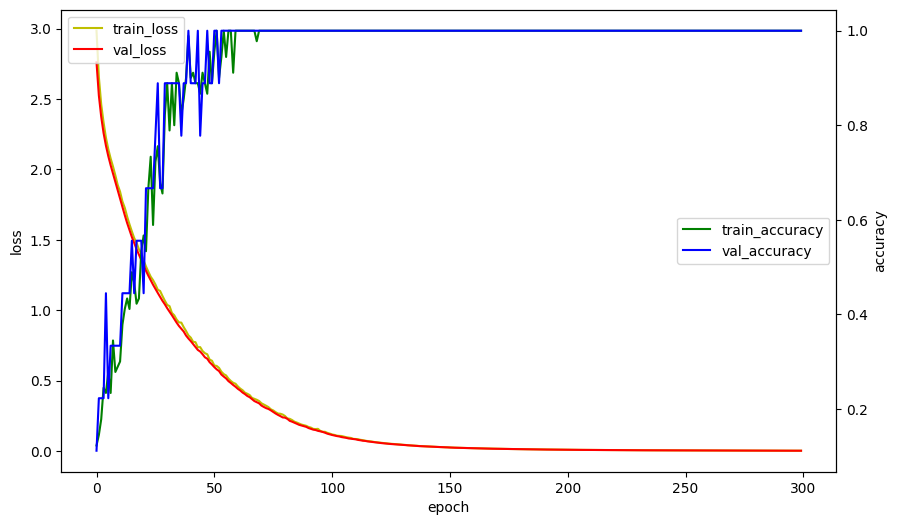

In [40]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val_loss')
acc_ax= loss_ax.twinx() #
acc_ax.plot(hist.history['accuracy'],'g',label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b',label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [35]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
# 모델 평가하기 (모델 학습 설정과정의 loss, metrics)
score= model.evaluate(x_val, Y_val, batch_size=3)
print('loss & accuracy: ', score)

3/3 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000


# 7 모델 사용하기 (모델을 이용해서 예측하기)

In [43]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 29ms/step


4

In [44]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 18ms/step


4

In [46]:
# 몇%의 확률로 4라고 예측했니?
H[0, H.argmax()]*100

99.82514977455139

In [50]:
# 2, 4, 6 의 확률
H[0 , [2,4,6]] * 100

array([8.341518e-02, 9.982515e+01, 9.142827e-02], dtype=float32)

# 7. 모델 저장

In [51]:
model.save('model/02_deep.h5')